In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/vgsales.csv")
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
data.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
data.dropna(inplace = True)

In [13]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)  # Top 10 genre numbers
custom_colors = mpl.colors.Normalize(vmin = min(game), vmax = max(game))
colors = [mpl.cm.PuBu(custom_colors(i)) for i in game]
colors

[(0.00784313725490196, 0.2196078431372549, 0.34509803921568627, 1.0),
 (0.7988927335640138, 0.8116109188773548, 0.8975624759707804, 1.0),
 (0.9415609381007305, 0.9194156093810073, 0.9566320645905421, 1.0),
 (0.5871587850826606, 0.7156478277585544, 0.8435063437139562, 1.0),
 (0.9322106881968474, 0.9115417147251057, 0.9522029988465974, 1.0),
 (1.0, 0.9686274509803922, 0.984313725490196, 1.0),
 (0.8217147251057285, 0.8243444828911957, 0.9045444059976933, 1.0),
 (0.7058823529411765, 0.7673202614379085, 0.873202614379085, 1.0),
 (0.7988927335640138, 0.8116109188773548, 0.8975624759707804, 1.0),
 (0.9392233756247598, 0.917447135717032, 0.9555247981545559, 1.0)]

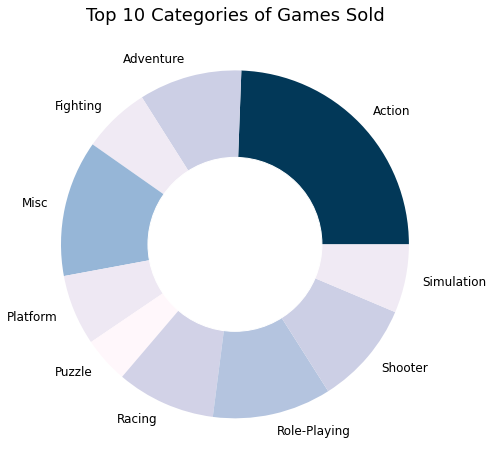

In [17]:
plt.figure(figsize = (8, 8))
plt.pie(game, labels = game.index, colors = colors)
central_circle = plt.Circle((0,0),  0.5,  color = "white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc("font",size = 12)
plt.title("Top 10 Categories of Games Sold", fontsize = 18)
plt.show()

In [18]:
data.corr()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,0.178027,-0.400315,-0.379137,-0.269323,-0.332735,-0.426975
Year,0.178027,1.000000,-0.091285,0.006108,-0.169387,0.041128,-0.074647
NA_Sales,-0.400315,-0.091285,1.000000,0.768923,0.451283,0.634518,0.941269
EU_Sales,-0.379137,0.006108,0.768923,1.000000,0.436379,0.726256,0.903264
JP_Sales,-0.269323,-0.169387,0.451283,0.436379,1.000000,0.290559,0.612774
Other_Sales,-0.332735,0.041128,0.634518,0.726256,0.290559,1.000000,0.747964
Global_Sales,-0.426975,-0.074647,0.941269,0.903264,0.612774,0.747964,1.000000


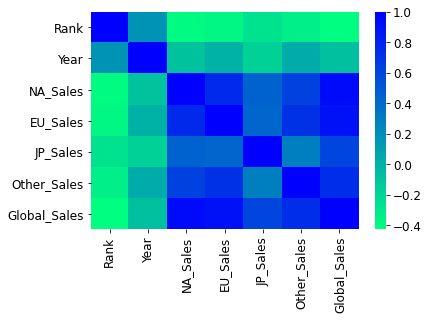

In [19]:
sns.heatmap(data.corr(), cmap = "winter_r")
plt.show()

In [21]:
x = data[["Rank","NA_Sales","EU_Sales","JP_Sales","Other_Sales"]]
y = data["Global_Sales"]

In [25]:
# Model
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [33]:
x_test.iloc[0:1].to_numpy()

array([[3.529e+03, 5.200e-01, 1.000e-02, 0.000e+00, 4.000e-02]])

In [34]:
new_pred = model.predict([(1, 41.49, 29.02, 3.77, 8.46)])

In [35]:
new_pred

array([82.73505405])

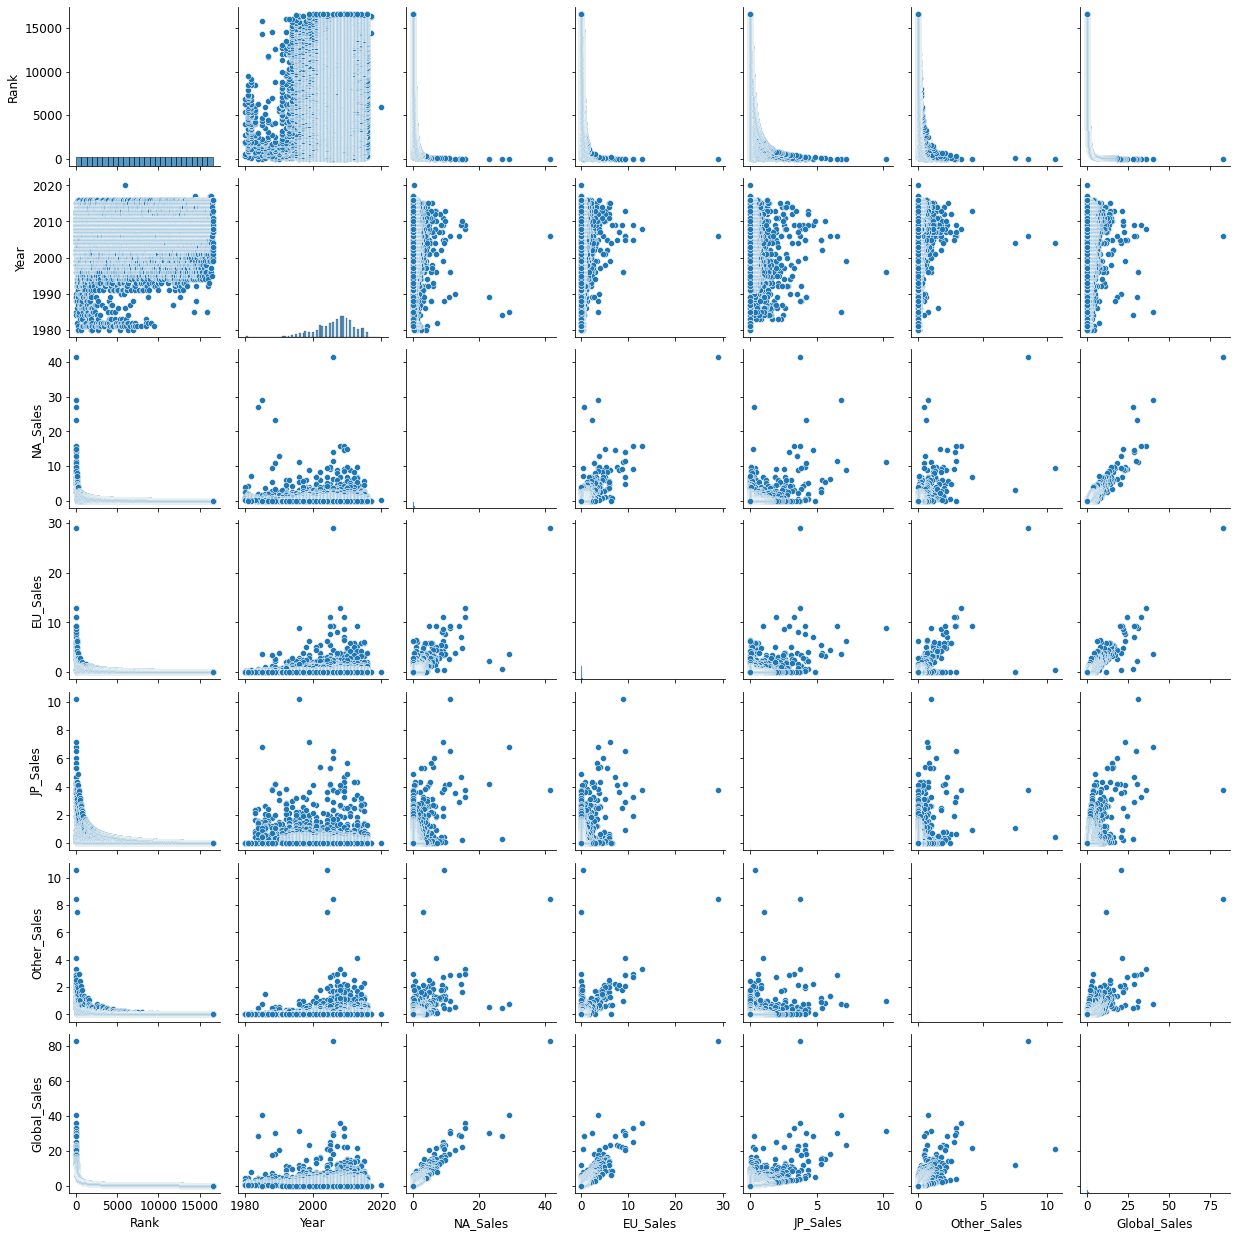

In [36]:
sns.pairplot(data)